In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("./mensagens_jairmbolsonaro1_channel_metadata.csv", )
df

,id,text,data,hora,views,encaminhamentos
0,13,- Acordo com o Japão para o desenvolvimento de...,2021-01-11,10:34:03,114302,608
1,14,Rio Grande do Sul: Governo Jair Messias Bolson...,2021-01-11,10:59:52,112626,202
2,15,NaN,2021-01-11,11:00:10,115737,249
3,17,NaN,2021-01-11,18:40:46,132853,390
4,18,https://youtu.be/qlNKtgXbdb4,2021-01-11,18:43:51,134446,167
...,...,...,...,...,...,...
2426,2533,Imagens de passagens de fauna diretamente de n...,2021-10-11,11:06:19,101386,354
2427,2534,Aproximadamente 405 kg de cloridrato de cocaín...,2021-10-11,11:09:33,93814,159
2428,2535,"Em sua primeira ação, o programa Rios+Limpos r...",2021-10-11,11:14:51,93644,283
2429,2536,Curso Alfabetização Baseada na Ciência (ABC): ...,2021-10-11,11:17:36,110704,197


Importante: o index do dataframe é diferente do id das mensagens(que é sequencial) porque algumas mensagens parecem ter sido apagadas e suas informações não podem ser recuperadas - apesar do id continuar sua sequência independente disso, é claro

In [33]:
df["views"]

0       114302
1       112626
2       115737
3       132853
4       134446
         ...  
2426    101386
2427     93814
2428     93644
2429    110704
2430    118283
Name: views, Length: 2431, dtype: int64

Removendo os últimos dias para que o número de views não esteja distorcido

In [36]:
df = df.drop(df[df.data > "2021-10-08"].index)
df

,id,text,data,hora,views,encaminhamentos
0,13,- Acordo com o Japão para o desenvolvimento de...,2021-01-11,10:34:03,114302,608
1,14,Rio Grande do Sul: Governo Jair Messias Bolson...,2021-01-11,10:59:52,112626,202
2,15,NaN,2021-01-11,11:00:10,115737,249
3,17,NaN,2021-01-11,18:40:46,132853,390
4,18,https://youtu.be/qlNKtgXbdb4,2021-01-11,18:43:51,134446,167
...,...,...,...,...,...,...
2408,2515,NaN,2021-10-08,14:24:23,136242,187
2409,2516,O Ministério da Comunicação já fez muitas entr...,2021-10-08,14:29:06,140111,202
2410,2517,Sancionamos alteração na LDO 2021 que viabiliz...,2021-10-08,14:37:00,147245,313
2411,2518,Excelente notícia: Marco das Ferrovias Autoriz...,2021-10-08,14:40:49,175561,324


In [47]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df["data"],
                    y=df["views"],
                    name = "example",
                    line = dict(color = 'green'),
                    opacity = 0.6)

layout = dict(title="Número de visualizações das mensagens do canal oficial de Jair Bolsonaro no Telegram (11/01/2021 - 08/10/2021)",)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [41]:
df["views"].describe()

count      2413.000000
mean     200534.442603
std       33363.387385
min      112626.000000
25%      179917.000000
50%      195487.000000
75%      212686.000000
max      388626.000000
Name: views, dtype: float64

In [42]:
df["views"].median()

195487.0

In [49]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

trace1 = go.Scatter(x=df["data"],
                    y=df["encaminhamentos"],
                    name = "example",
                    line = dict(color = 'green'),
                    opacity = 0.6)

layout = dict(title="Número de encaminhamentos das mensagens do canal oficial de Jair Bolsonaro no Telegram (11/01/2021 - 08/10/2021)",)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

In [50]:
df["encaminhamentos"].describe()

count    2413.000000
mean      436.216743
std       404.110791
min        81.000000
25%       218.000000
50%       305.000000
75%       466.000000
max      3872.000000
Name: encaminhamentos, dtype: float64

In [51]:
df["encaminhamentos"].median()

305.0

In [52]:
from wordcloud import WordCloud, STOPWORDS
import re

In [70]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(350.0 * 55 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

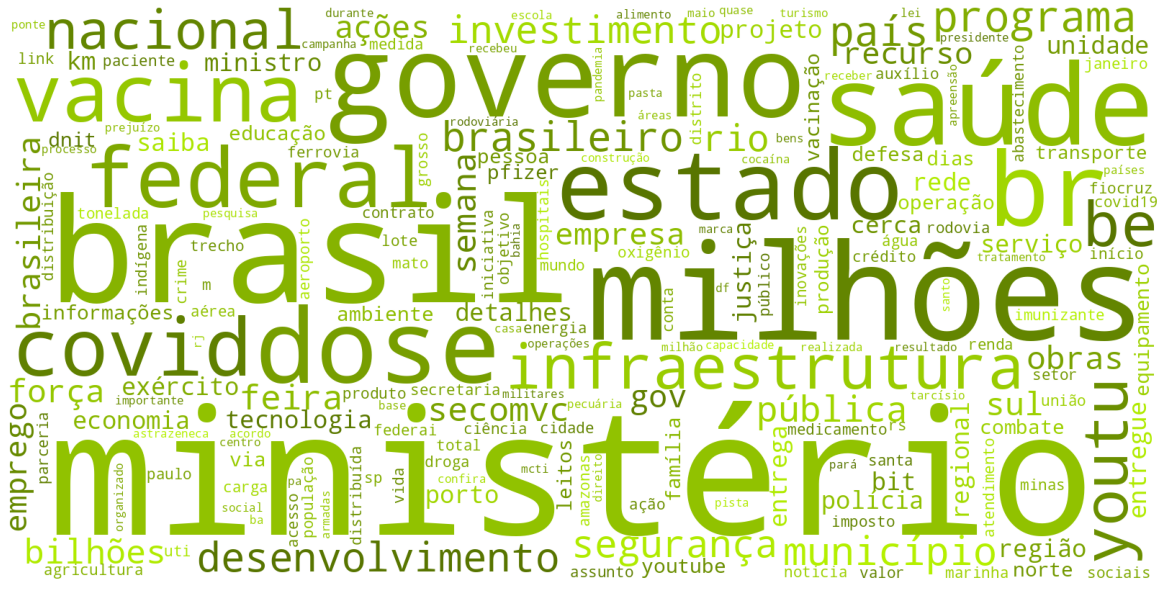

In [75]:
comment_words = ''
stopwords = ['pra', 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'deu', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vc', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_', 'token', 'laranjeirasnew', 'laranjeirasnews', 'http', 'ly', 'www', 'r', 'nan', 'https' ]
  
for term in df["text"]:
      
    term = str(term)
  
    tokens = term.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1600, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10,
                      color_func=random_color_func,
                      collocations=False
                      ).generate(comment_words)

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('./top_termos_bolsonaro.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [74]:
df.where(df["encaminhamentos"] > 3700).dropna()

,id,text,data,hora,views,encaminhamentos
408,451.0,- Repasses do Governo 🇧🇷 Federal para cada est...,2021-02-28,18:57:45,269755.0,3872.0
551,609.0,*- O eterno jogo sujo da esquerda.*,2021-03-19,19:30:25,280478.0,3815.0
1930,2030.0,"- Conforme prometido em entrevista ao ""Pingos ...",2021-08-05,00:30:49,260007.0,3744.0
